In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [10]:
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
df.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

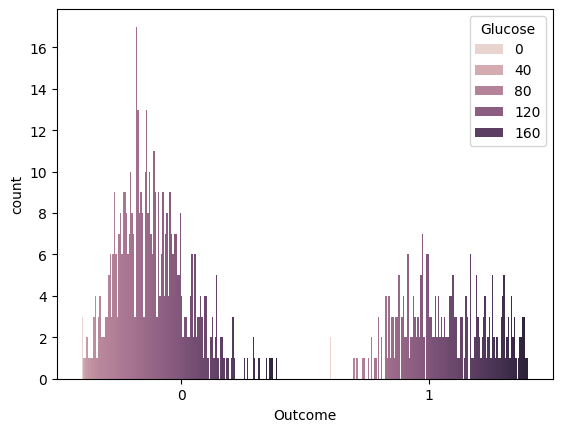

In [14]:
sns.countplot(data=df, x="Outcome", hue="Glucose")

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
#Remove the feature with correlation to outcome less than 0.2

In [18]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])
X2 = X.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [20]:
# Set random seed
tf.random.set_seed(42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid") 
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# Fit the model
class_weight = {0: 1, 1: 0.8}
history = model.fit(X_train, y_train, epochs=100,  validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 28ms/step - loss: 0.4991 - accuracy: 0.7569 - val_loss: 0.5566 - val_accuracy: 0.7292
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4642 - accuracy: 0.7691 - val_loss: 0.5599 - val_accuracy: 0.7031
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4593 - accuracy: 0.7760 - val_loss: 0.5408 - val_accuracy: 0.7240
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4552 - accuracy: 0.7812 - val_loss: 0.5404 - val_accuracy: 0.7344
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.4543 - accuracy: 0.7812 - val_loss: 0.5555 - val_accuracy: 0.7292
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4561 - accuracy: 0.7760 - val_loss: 0.5430 - val_accuracy: 0.7292
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.4553 - accuracy: 0.7812 - val_loss: 0.5378 - val_accuracy: 0.7240
Epoch 8/100


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 20)                  100       
                                                                 
 dense_1 (Dense)             (32, 20)                  420       
                                                                 
 dense_2 (Dense)             (32, 1)                   21        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


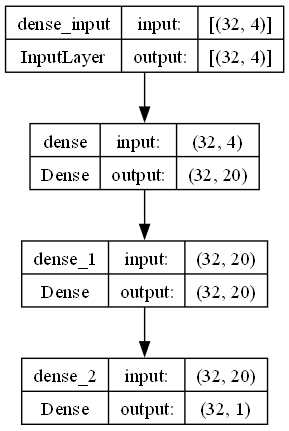

In [37]:
keras.utils.plot_model(
    model, show_shapes=True, dpi=100, to_file="model.png"
)

In [21]:
acc = history.history

In [38]:
acc

{'loss': [0.49909061193466187,
  0.46415069699287415,
  0.45928293466567993,
  0.4551975429058075,
  0.4542659521102905,
  0.45614030957221985,
  0.4553070664405823,
  0.4532024562358856,
  0.4555184543132782,
  0.458630234003067,
  0.44691312313079834,
  0.44620281457901,
  0.44621118903160095,
  0.44755256175994873,
  0.4496752917766571,
  0.44331496953964233,
  0.44566333293914795,
  0.4414874017238617,
  0.44407832622528076,
  0.4485430121421814,
  0.4412625730037689,
  0.439414381980896,
  0.4406895339488983,
  0.4398142099380493,
  0.439207524061203,
  0.4381142854690552,
  0.4369501769542694,
  0.43807995319366455,
  0.4333125948905945,
  0.4344558119773865,
  0.4281426668167114,
  0.4327669143676758,
  0.43088898062705994,
  0.4300418496131897,
  0.4293518662452698,
  0.4299587607383728,
  0.4302777349948883,
  0.4324057400226593,
  0.42568862438201904,
  0.42177292704582214,
  0.43007513880729675,
  0.4297846257686615,
  0.42296695709228516,
  0.4301721751689911,
  0.424751788

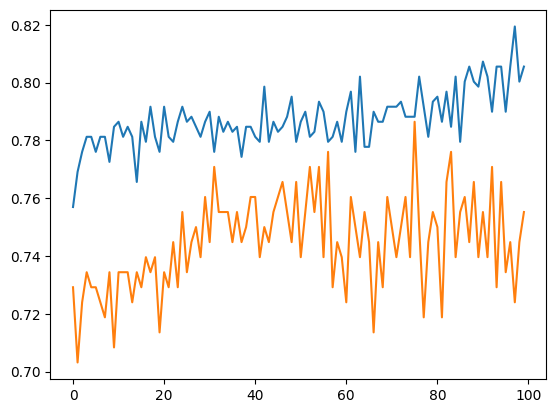

In [39]:
plt.plot(acc['accuracy'])
plt.plot(acc['val_accuracy'])

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

6/6 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.7552
Model loss on test set: 0.5716295838356018
Model accuracy on test set: 75.52%


In [24]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

6/6 [==============================] - 0s 2ms/step


array([[95, 28],
       [19, 50]], dtype=int64)

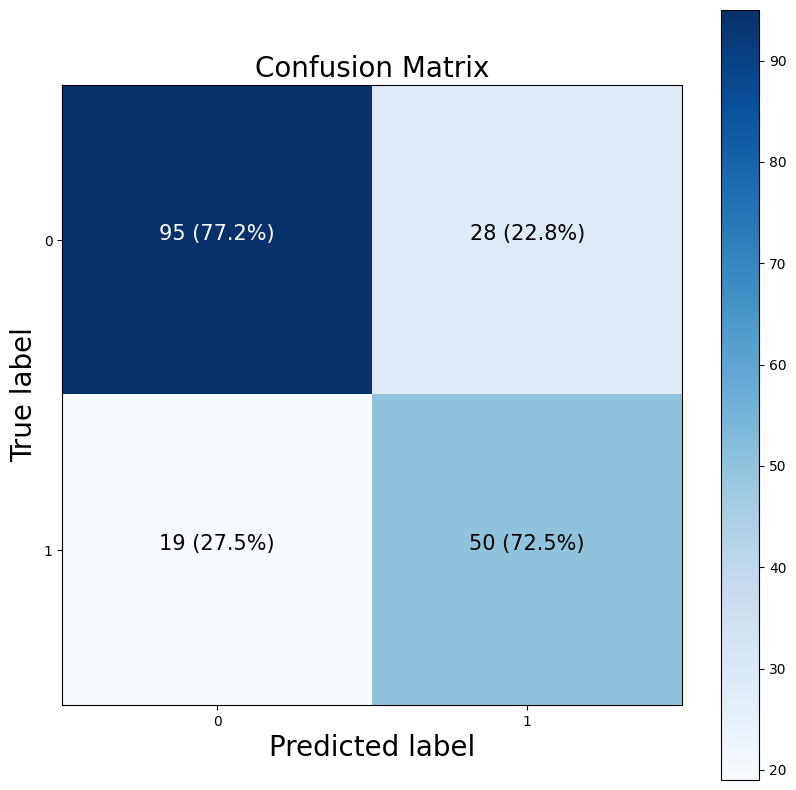

In [25]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tf.round(y_preds)))
                            
#confusion_matrixy_test, tf.round(y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       123
           1       0.64      0.72      0.68        69

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.76      0.76      0.76       192

